In [1]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

## Q1

In [2]:
# Create the dataset
data = {
    'point': ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9'],
    'x': [1, 3, 9, 3, 7, 9, 4, 8, 1],
    'y': [1, 2, 1, 7, 2, 7, 8, 3, 4]
}

df = pd.DataFrame(data)
points = df[['x', 'y']].values


In [3]:
# Calculate the distance matrix
distance_matrix = pdist(points, metric='euclidean')
distance_matrix_square = squareform(distance_matrix)


In [4]:
# Single linkage
single_linkage = sch.linkage(distance_matrix, method='single')
# Complete linkage
complete_linkage = sch.linkage(distance_matrix, method='complete')
# Average linkage
average_linkage = sch.linkage(distance_matrix, method='average')
# Centroid linkage
centroid_linkage = sch.linkage(distance_matrix, method='centroid')
# Ward linkage
ward_linkage = sch.linkage(distance_matrix, method='ward')

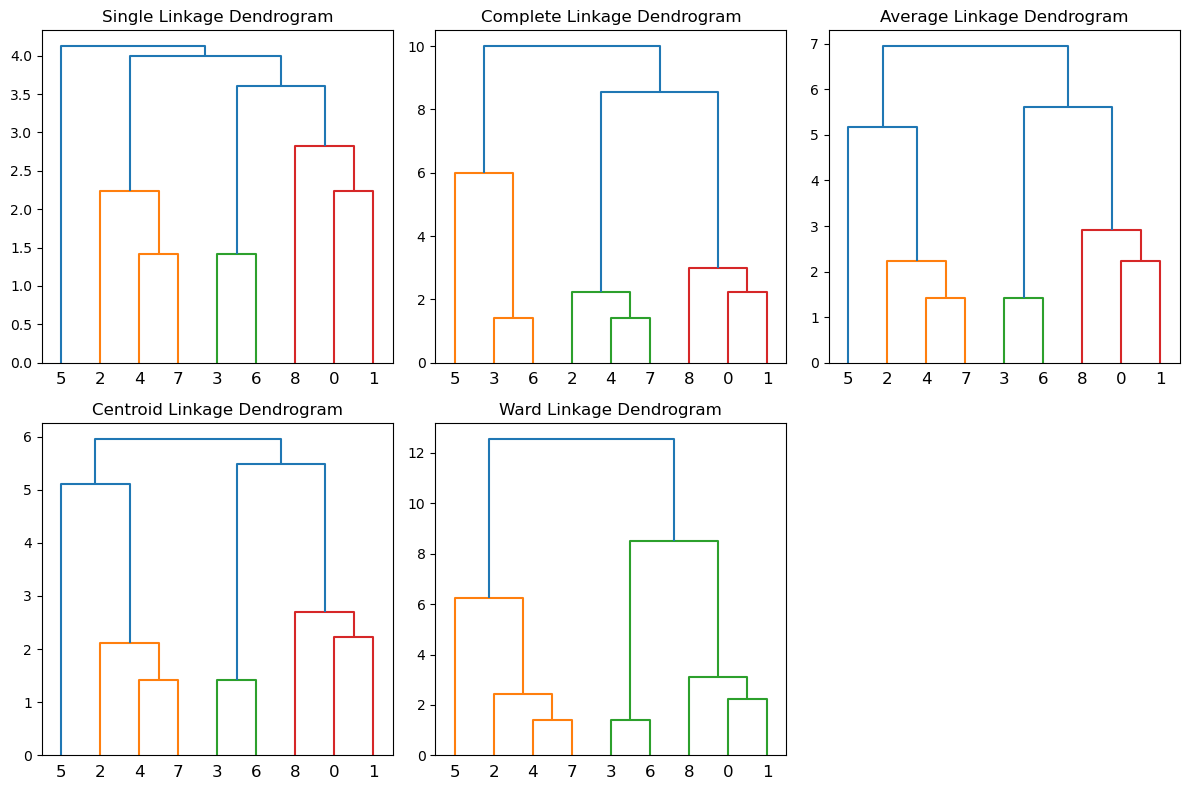

In [5]:
plt.figure(figsize=(12, 8))

# Single Linkage Dendrogram
plt.subplot(231)
sch.dendrogram(single_linkage)
plt.title('Single Linkage Dendrogram')

# Complete Linkage Dendrogram
plt.subplot(232)
sch.dendrogram(complete_linkage)
plt.title('Complete Linkage Dendrogram')

# Average Linkage Dendrogram
plt.subplot(233)
sch.dendrogram(average_linkage)
plt.title('Average Linkage Dendrogram')

# Centroid Linkage Dendrogram
plt.subplot(234)
sch.dendrogram(centroid_linkage)
plt.title('Centroid Linkage Dendrogram')

# Ward Linkage Dendrogram
plt.subplot(235)
sch.dendrogram(ward_linkage)
plt.title('Ward Linkage Dendrogram')

plt.tight_layout()
plt.show()


## Q2

In [6]:
def calculate_proximity_matrix(points, metric='euclidean', p=2):
    if metric == 'euclidean':
        return squareform(pdist(points, metric='euclidean'))
    elif metric == 'manhattan':
        return squareform(pdist(points, metric='cityblock'))
    elif metric == 'minkowski':
        return squareform(pdist(points, metric='minkowski', p=p))
    else:
        raise ValueError("Unsupported distance metric.")

# Calculate proximity matrices
euclidean_matrix = calculate_proximity_matrix(points, 'euclidean')
manhattan_matrix = calculate_proximity_matrix(points, 'manhattan')
minkowski_matrix = calculate_proximity_matrix(points, 'minkowski', p=3)

# Display the proximity matrices
print("Euclidean Proximity Matrix:\n", euclidean_matrix)
print("Manhattan Proximity Matrix:\n", manhattan_matrix)
print("Minkowski Proximity Matrix:\n", minkowski_matrix)


Euclidean Proximity Matrix:
 [[ 0.          2.23606798  8.          6.32455532  6.08276253 10.
   7.61577311  7.28010989  3.        ]
 [ 2.23606798  0.          6.08276253  5.          4.          7.81024968
   6.08276253  5.09901951  2.82842712]
 [ 8.          6.08276253  0.          8.48528137  2.23606798  6.
   8.60232527  2.23606798  8.54400375]
 [ 6.32455532  5.          8.48528137  0.          6.40312424  6.
   1.41421356  6.40312424  3.60555128]
 [ 6.08276253  4.          2.23606798  6.40312424  0.          5.38516481
   6.70820393  1.41421356  6.32455532]
 [10.          7.81024968  6.          6.          5.38516481  0.
   5.09901951  4.12310563  8.54400375]
 [ 7.61577311  6.08276253  8.60232527  1.41421356  6.70820393  5.09901951
   0.          6.40312424  5.        ]
 [ 7.28010989  5.09901951  2.23606798  6.40312424  1.41421356  4.12310563
   6.40312424  0.          7.07106781]
 [ 3.          2.82842712  8.54400375  3.60555128  6.32455532  8.54400375
   5.          7.07106781

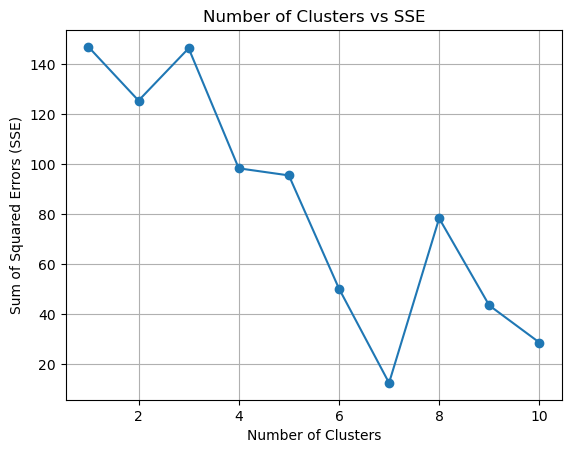

In [9]:
def calculate_sse(points, cluster_labels):
    sse = 0
    for cluster in np.unique(cluster_labels):
        cluster_points = points[cluster_labels == cluster]
        cluster_center = np.mean(cluster_points, axis=0)
        sse += np.sum((cluster_points - cluster_center) ** 2)
    return sse

def plot_sse(points, max_clusters=10):
    sse_values = []
    for k in range(1, max_clusters + 1):
        # Simple random clustering for demonstration
        cluster_labels = np.random.randint(0, k, size=len(points))
        sse = calculate_sse(points, cluster_labels)
        sse_values.append(sse)

    plt.plot(range(1, max_clusters + 1), sse_values, marker='o')
    plt.title('Number of Clusters vs SSE')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.grid()
    plt.show()

# Plot SSE
plot_sse(points)

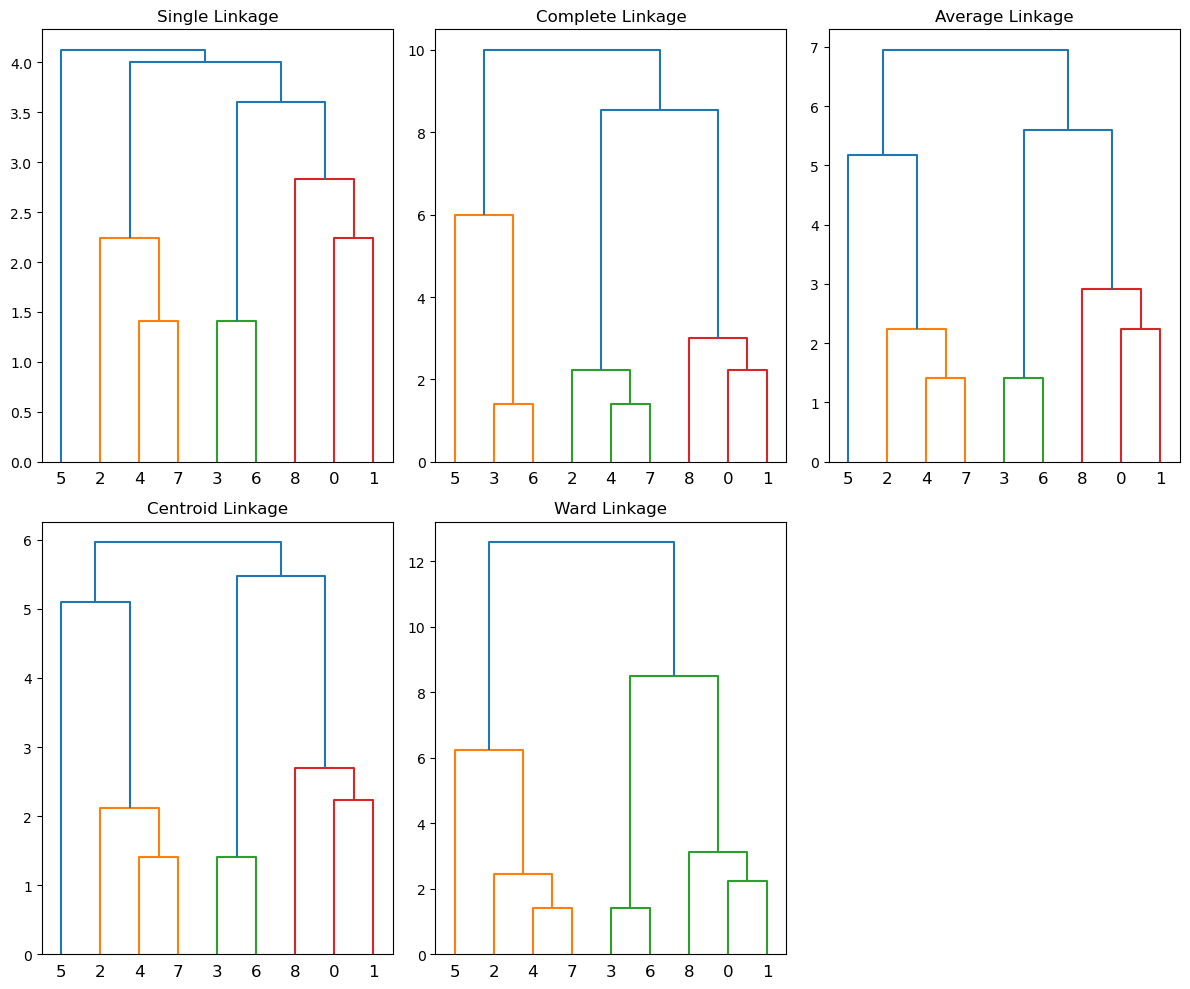

In [8]:
def plot_dendrograms(points):
    plt.figure(figsize=(12, 10))

    # Single Linkage
    plt.subplot(231)
    single_linkage = sch.linkage(pdist(points), method='single')
    sch.dendrogram(single_linkage)
    plt.title('Single Linkage')

    # Complete Linkage
    plt.subplot(232)
    complete_linkage = sch.linkage(pdist(points), method='complete')
    sch.dendrogram(complete_linkage)
    plt.title('Complete Linkage')

    # Average Linkage
    plt.subplot(233)
    average_linkage = sch.linkage(pdist(points), method='average')
    sch.dendrogram(average_linkage)
    plt.title('Average Linkage')

    # Centroid Linkage
    plt.subplot(234)
    centroid_linkage = sch.linkage(pdist(points), method='centroid')
    sch.dendrogram(centroid_linkage)
    plt.title('Centroid Linkage')

    # Ward Linkage
    plt.subplot(235)
    ward_linkage = sch.linkage(pdist(points), method='ward')
    sch.dendrogram(ward_linkage)
    plt.title('Ward Linkage')

    plt.tight_layout()
    plt.show()

# Plot Dendrograms
plot_dendrograms(points)
